In [10]:
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
from numpy import linalg as LA

## Setting Protocol

40 subjects each subject have 9 images
so, Training Images per subject would be 6 and Testing would be 3

In [11]:
path = "img"
width  = 92
height = 112
totalPerson=40 # s1- s40 or 40 subjects each subject 9 images
noOfTrainImage= 6*totalPerson #6 pimages for training
noOfTestImageImage= 3*totalPerson #3 pimages for Testing

In [12]:
training = np.empty(0)
testing = np.empty(0)
for i in range(40):
    for j in range(9):
        if j < 6:
            training = np.append(training, f"{path}\\s{i+1}\\{j+1}.pgm")
        else:
            testing = np.append(testing, f"{path}\\s{i+1}\\{j+1}.pgm") 

## 1)Every Pic Quantized(0-255) Value Store in 1 Dimension

Train Images:


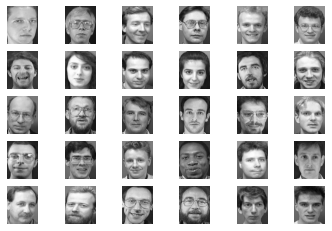

In [13]:
vector=np.ndarray(shape=(noOfTrainImage, height*width), dtype=np.float64) # Empty Array of 10304x240
for i in range(len(training)):
    img = plt.imread("" + training[i]) # Read image in 2d (112*92) ()
    vector[i,:] = np.array(img, dtype='float64').flatten() # Make it 1 Dimension

    
testingVector=np.ndarray(shape=(noOfTrainImage, height*width), dtype=np.float64)
for i in range(len(testing)):
    img = plt.imread("" + testing[i])
    testingVector[i,:] = np.array(img, dtype='float64').flatten()
    
print("Train Images:")   
images = [plt.imread(training[i]) for i in range(1,len(training),6)]
fig, axes = plt.subplots(5, 6, sharex=True, sharey=True) 
for img, ax in zip(images, axes.flat):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

## 2) Column Wise Mean (10304x1)

In [14]:
mean = np.zeros((1,height*width))
for i in vector:
    mean = np.add(mean,i)
mean = np.divide(mean,float(noOfTrainImage)).flatten()

## 3) Find Mean Difference(10304x240)

In [15]:
meanDiff = np.ndarray(shape=(noOfTrainImage, height*width))
for i in range((noOfTrainImage)):
    meanDiff[i] = np.subtract(vector[i],mean)    

Normalized Images:


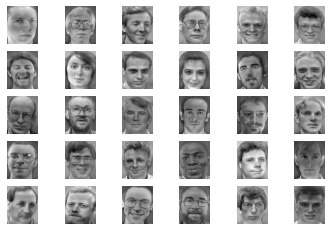

In [16]:
print("Normalized Images:")   
images = [(meanDiff[i].reshape(height,width)) for i in range(1,len(training),6)]
fig, axes = plt.subplots(5, 6, sharex=True, sharey=True) 
for img, ax in zip(images, axes.flat):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

## 4) Coveriance Calculate(280x280)

Relationship b/w two Random Variables

In [17]:
covMatrix=np.cov(meanDiff)
covMatrix = np.divide(covMatrix,240)
print('Covariance Matrix Shape:', covMatrix.shape)

Covariance Matrix Shape: (240, 240)


## 5) Eigen Values and Vector

koi features repeat horhe hon unki khtm krta hai

In [18]:
eigenValues, eigenVectors = LA.eig(covMatrix)
print('eigenvalues.shape: {} eigenvectors.shape: {}'.format(eigenValues.shape, eigenVectors.shape))

eigenvalues.shape: (240,) eigenvectors.shape: (240, 240)


## 6) EigenSpace

In [19]:
eigenSpace = np.dot(vector.transpose(),np.transpose(eigenVectors))
eigenSpace = eigenSpace.transpose()
eigenSpace.shape

(240, 10304)

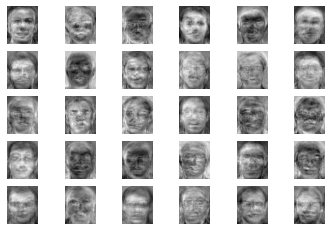

In [20]:
images = [(eigenSpace[i].reshape(height,width)) for i in range(0,eigenSpace.shape[0],6)]
fig, axes = plt.subplots(5, 6, sharex=True, sharey=True) 
for img, ax in zip(images, axes.flat):
    ax.imshow(img, cmap='gray')
    ax.axis('off')

### 7) Mapping our Images Into Eigen Space

In [21]:
w = np.array([np.dot(eigenSpace,i) for i in meanDiff])
print(w.shape)

(240, 240)


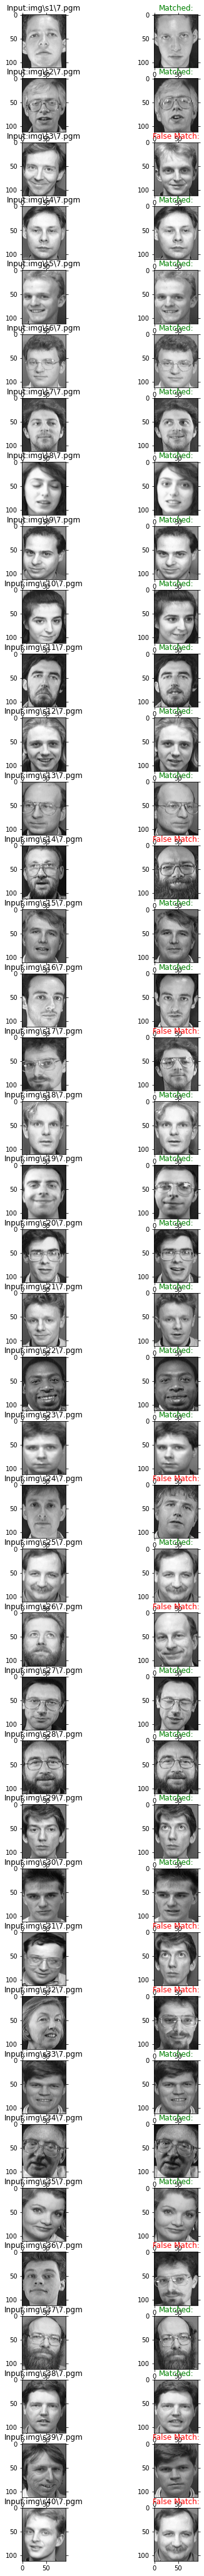

In [23]:
count=0
numOfimages=0
matchImages=0
def Visualization(testImg, trainingImages,proj_data,w, highestValueinMap):
    global count,numOfimages,matchImages
    testFace= plt.imread(testImg)
    numOfimages += 1
    testFaceVector = np.array(testFace, dtype='float64').flatten()
    testFaceMeanDiff = np.subtract(testFaceVector,mean)
    
    plt.subplot(120,2,1+count)
    plt.imshow(testFace, cmap='gray')
    plt.title('Input:'+'.'.join(testImg.split('//')[:1]))
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    count+=1
    
    mappingTest = np.dot(eigenSpace, testFaceMeanDiff)
    diff  = w - mappingTest
    ecludeanDistance = LA.norm(diff, axis=1)
    index = np.argmin(ecludeanDistance)

   


    plt.subplot(120,2,1+count)
    if ecludeanDistance[index] <= highestValueinMap: # It's a face
        match = testImg.split('\\' )[1] == trainingImages[index].split('\\')[1]
        if match:
            plt.title('Matched:', color='g')
            plt.imshow(imread(trainingImages[index]), cmap='gray')       
            matchImages += 1
        else:
            plt.title('False Match:', color='r')
            plt.imshow(imread(trainingImages[index]), cmap='gray')

                
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    plt.subplots_adjust(right=1.2, top=5.8)
   
    count+=1
    
fig = plt.figure(figsize=(5, 30))


for i in range(0,len(testing),3):
    Visualization(testing[i], training,eigenSpace,w, highestValueinMap=174784509.00590986)

plt.show()

In [24]:
print(f"Accuracy {int((matchImages/numOfimages)*100)}%")

Accuracy 75%
